<a href="https://colab.research.google.com/github/daviimt/ApiProducts/blob/master/MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: light
#       format_version: '1.5'
#       jupytext_version: 1.14.0
#   kernelspec:
#     display_name: local-spark-python
#     language: python
#     name: spark-python-local-spark-python
# ---

# # MODELADO INICIAL

# +
#python -m ipykernel install --user --name=Secure_SWIFT_env --display-name "Python (Secure_SWIFT_env)"
# -

from sklearn.cluster import KMeans
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sys
import random
warnings.filterwarnings('ignore')
print("Librerias importadas")
print(sys.version)
print(sys.executable)

# +
#Importación datos procesados
data = {
    'DIVISA': ['USD', 'EUR', 'GBP', 'JPY', 'AUD'],
    'EMISOR_INICIAL': ['Banco A', 'Banco B', 'Banco C', 'Banco D', 'Banco E'],
    'RECEPTOR_FINAL': ['Banco F', 'Banco G', 'Banco H', 'Banco I', 'Banco J'],
    'IBAN_EMISOR': [f'GB{random.randint(10**14, 10**15-1)}' for _ in range(5)],
    'IBAN_RECEPTOR': [f'GB{random.randint(10**14, 10**15-1)}' for _ in range(5)],
    'PAIS_EMISOR': ['Reino Unido', 'Francia', 'Alemania', 'Japón', 'Australia'],
    'PAIS_RECEPTOR': ['Reino Unido', 'Francia', 'Alemania', 'Japón', 'Australia'],
    'CANTIDAD': [random.uniform(100, 1000) for _ in range(5)],  # Cantidades aleatorias entre 100 y 1000
    'AÑO': [random.choice([2021, 2022, 2023]) for _ in range(5)],  # Años aleatorios
    'MES': [random.randint(1, 12) for _ in range(5)],  # Meses aleatorios
    'DÍA': [random.randint(1, 28) for _ in range(5)]   # Días aleatorios (hasta 28 para evitar problemas de mes)
}

# Crear el DataFrame
df = pd.DataFrame(data)
datos_2=  pd.concat([df, df], ignore_index=True)

# Mostrar el DataFrame
print(df)
print(f"Datos importados. Hay {len(datos_2)} registros")

display(datos_2.head(5))

print("Codificando variables")

# Seleccionar las columnas categóricas para la codificación one-hot
categorical_cols = ['DIVISA', 'EMISOR_INICIAL', 'RECEPTOR_FINAL', 'IBAN_EMISOR', 'IBAN_RECEPTOR', 'PAIS_EMISOR', 'PAIS_RECEPTOR']

Librerias importadas
3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
/usr/bin/python3
  DIVISA EMISOR_INICIAL RECEPTOR_FINAL        IBAN_EMISOR      IBAN_RECEPTOR  \
0    USD        Banco A        Banco F  GB662153862223255  GB193054021404005   
1    EUR        Banco B        Banco G  GB345719900379355  GB969674948087517   
2    GBP        Banco C        Banco H  GB409803126472298  GB182061495806386   
3    JPY        Banco D        Banco I  GB947709263818120  GB374880595896047   
4    AUD        Banco E        Banco J  GB230732493804446  GB555672530106763   

   PAIS_EMISOR PAIS_RECEPTOR    CANTIDAD   AÑO  MES  DÍA  
0  Reino Unido   Reino Unido  425.863157  2022   10   18  
1      Francia       Francia  662.527176  2021    6   26  
2     Alemania      Alemania  164.444117  2021    9   15  
3        Japón         Japón  153.746864  2023    8   12  
4    Australia     Australia  854.338260  2021    4   25  
Datos importados. Hay 10 registros


,DIVISA,EMISOR_INICIAL,RECEPTOR_FINAL,IBAN_EMISOR,IBAN_RECEPTOR,PAIS_EMISOR,PAIS_RECEPTOR,CANTIDAD,AÑO,MES,DÍA
0,USD,Banco A,Banco F,GB662153862223255,GB193054021404005,Reino Unido,Reino Unido,425.863157,2022,10,18
1,EUR,Banco B,Banco G,GB345719900379355,GB969674948087517,Francia,Francia,662.527176,2021,6,26
2,GBP,Banco C,Banco H,GB409803126472298,GB182061495806386,Alemania,Alemania,164.444117,2021,9,15
3,JPY,Banco D,Banco I,GB947709263818120,GB374880595896047,Japón,Japón,153.746864,2023,8,12
4,AUD,Banco E,Banco J,GB230732493804446,GB555672530106763,Australia,Australia,854.338260,2021,4,25


Codificando variables


DIVISA
EMISOR_INICIAL
RECEPTOR_FINAL
IBAN_EMISOR
IBAN_RECEPTOR
PAIS_EMISOR
PAIS_RECEPTOR


,DIVISA_FREQ,EMISOR_INICIAL_FREQ,RECEPTOR_FINAL_FREQ,IBAN_EMISOR_FREQ,IBAN_RECEPTOR_FREQ,PAIS_EMISOR_FREQ,PAIS_RECEPTOR_FREQ
0,0.2,0.2,0.2,0.2,0.2,0.2,0.2
1,0.2,0.2,0.2,0.2,0.2,0.2,0.2
2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
3,0.2,0.2,0.2,0.2,0.2,0.2,0.2
4,0.2,0.2,0.2,0.2,0.2,0.2,0.2


,CANTIDAD,AÑO,MES,DÍA,DIVISA_FREQ,EMISOR_INICIAL_FREQ,RECEPTOR_FINAL_FREQ,IBAN_EMISOR_FREQ,IBAN_RECEPTOR_FREQ,PAIS_EMISOR_FREQ,PAIS_RECEPTOR_FREQ
0,425.863157,2022,10,18,0.2,0.2,0.2,0.2,0.2,0.2,0.2
1,662.527176,2021,6,26,0.2,0.2,0.2,0.2,0.2,0.2,0.2
2,164.444117,2021,9,15,0.2,0.2,0.2,0.2,0.2,0.2,0.2
3,153.746864,2023,8,12,0.2,0.2,0.2,0.2,0.2,0.2,0.2
4,854.338260,2021,4,25,0.2,0.2,0.2,0.2,0.2,0.2,0.2


,DIVISA,EMISOR_INICIAL,RECEPTOR_FINAL,IBAN_EMISOR,IBAN_RECEPTOR,PAIS_EMISOR,PAIS_RECEPTOR,CANTIDAD,AÑO,MES,DÍA,DIVISA_FREQ,EMISOR_INICIAL_FREQ,RECEPTOR_FINAL_FREQ,IBAN_EMISOR_FREQ,IBAN_RECEPTOR_FREQ,PAIS_EMISOR_FREQ,PAIS_RECEPTOR_FREQ,CLUSTER
0,USD,Banco A,Banco F,GB662153862223255,GB193054021404005,Reino Unido,Reino Unido,425.863157,2022,10,18,0.2,0.2,0.2,0.2,0.2,0.2,0.2,2
1,EUR,Banco B,Banco G,GB345719900379355,GB969674948087517,Francia,Francia,662.527176,2021,6,26,0.2,0.2,0.2,0.2,0.2,0.2,0.2,1
2,GBP,Banco C,Banco H,GB409803126472298,GB182061495806386,Alemania,Alemania,164.444117,2021,9,15,0.2,0.2,0.2,0.2,0.2,0.2,0.2,4
3,JPY,Banco D,Banco I,GB947709263818120,GB374880595896047,Japón,Japón,153.746864,2023,8,12,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0
4,AUD,Banco E,Banco J,GB230732493804446,GB555672530106763,Australia,Australia,854.338260,2021,4,25,0.2,0.2,0.2,0.2,0.2,0.2,0.2,3


[2 1 4 0 3]


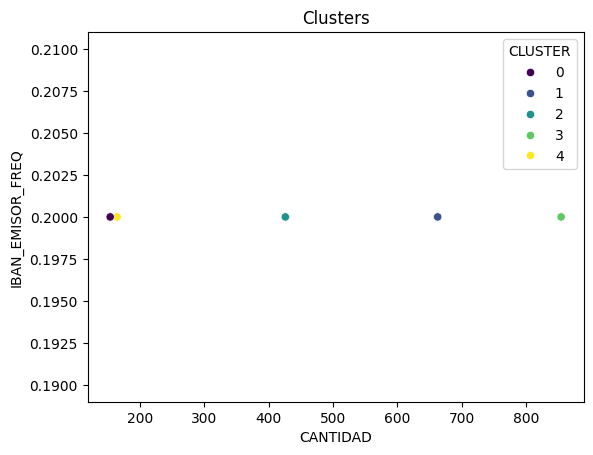

In [2]:
# Codificación de frecuencia para columnas categóricas
categorical_cols = ['DIVISA', 'EMISOR_INICIAL', 'RECEPTOR_FINAL', 'IBAN_EMISOR', 'IBAN_RECEPTOR', 'PAIS_EMISOR', 'PAIS_RECEPTOR']
for col in categorical_cols:
    print(col)
    freq_encoding = datos_2[col].value_counts() / len(datos_2)
    datos_2[col + '_FREQ'] = datos_2[col].map(freq_encoding)

# Verificar que las columnas codificadas por frecuencia están presentes
display(datos_2[[col + '_FREQ' for col in categorical_cols]].head())

# Seleccionar las columnas relevantes para la clusterización
cluster_data = datos_2[['CANTIDAD', 'AÑO', 'MES', 'DÍA'] + [col + '_FREQ' for col in categorical_cols]]

# Verificar las primeras filas del dataset preparado
display(cluster_data.head())

# +
# Definir el número de clusters
num_clusters = 5

# Inicializar y ajustar el modelo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(cluster_data)

# Asignar los clusters al dataset original
datos_2['CLUSTER'] = kmeans.labels_

# Ver las primeras filas con las etiquetas de los clusters
display(datos_2.head())
# -

print(datos_2["CLUSTER"].unique())

# Visualización de los clusters con Seaborn
sns.scatterplot(data=datos_2, x='CANTIDAD', y='IBAN_EMISOR_FREQ', hue='CLUSTER', palette='viridis')
plt.title('Clusters')
plt.xlabel('CANTIDAD')
plt.ylabel('IBAN_EMISOR_FREQ')
plt.show()

# # CONCLUSIONES INICIALES

# 1. Determinar el numero óptimo de clusters -> método Elbow
# 2. Demasiadas variables categóricas -> Reducción de dimensionalidad?
# 3. Solo se encuentra el año 2024, además no parece que el año sea una variable especialmente representativa -> eliminar
# 4. Probar otras codificaciones?

# +
# Método del codo
cluster_data = datos_2[['CANTIDAD', 'MES', 'DÍA'] + [col + '_FREQ' for col in categorical_cols]]

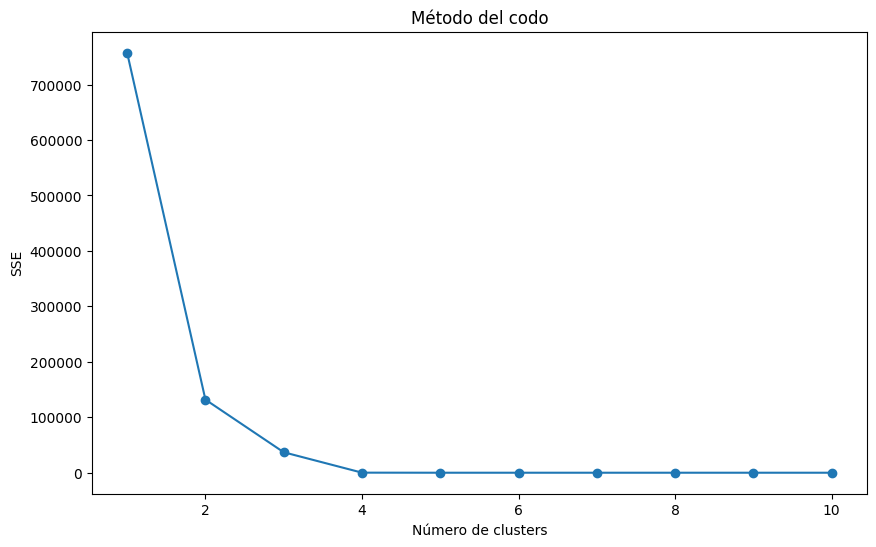

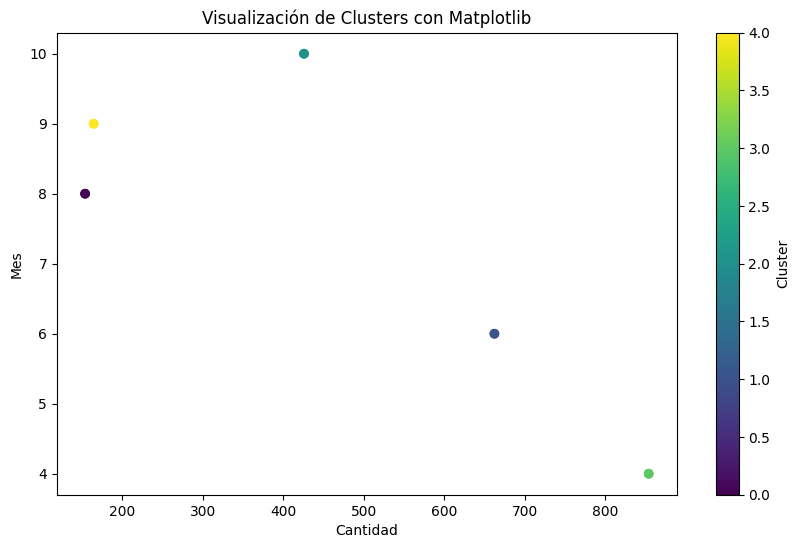

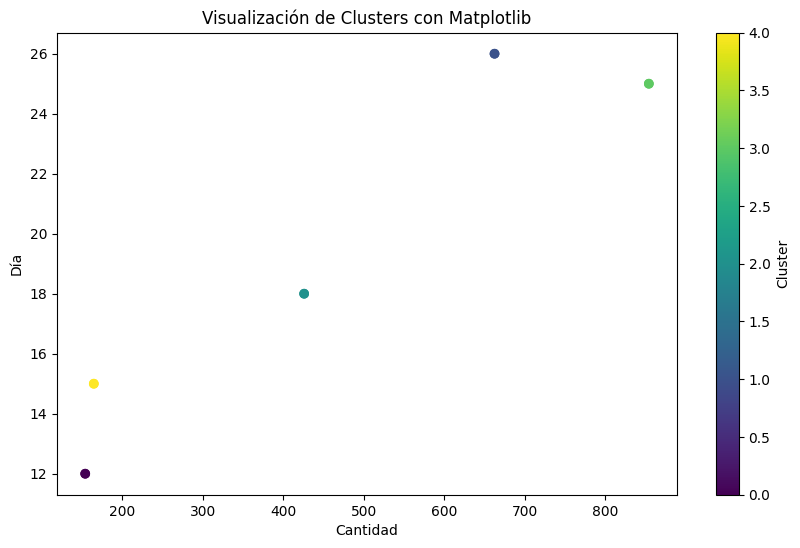

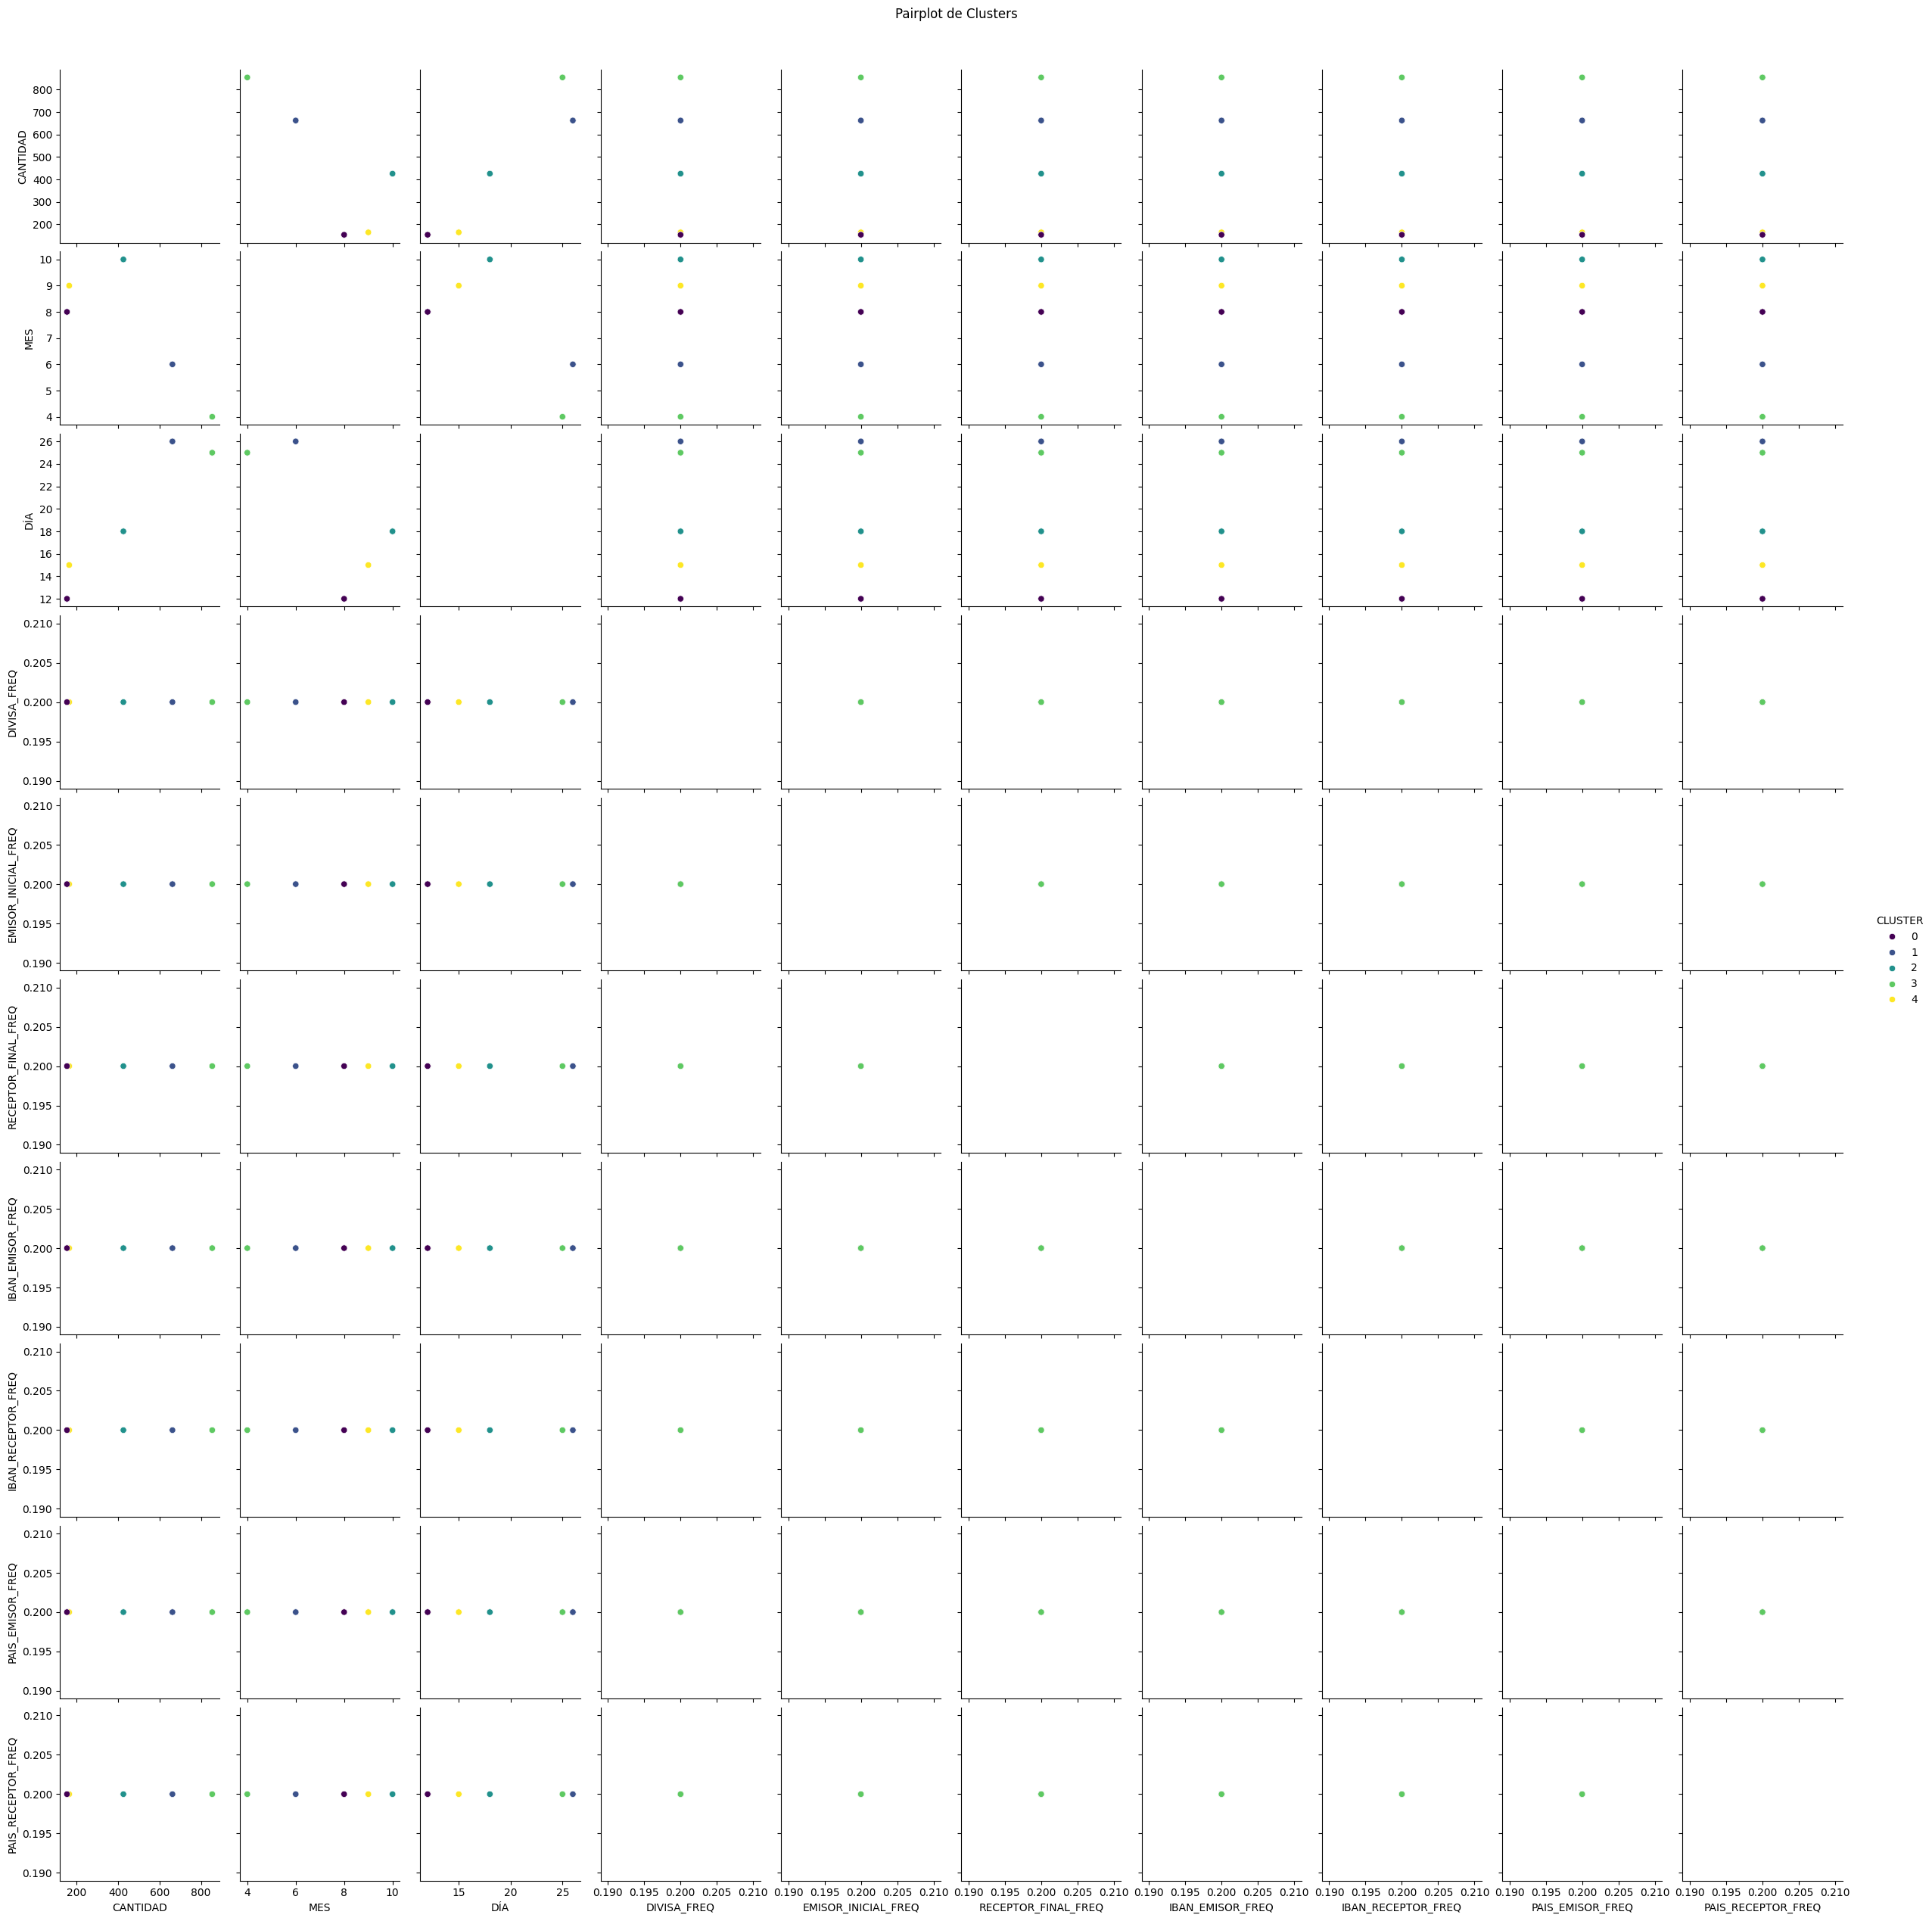

In [3]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()
# -

# El gráfico muestra una disminución pronunciada de SSE (Suma de los Errores Cuadrados) hasta alrededor de 4-5 clusters, después de lo cual la reducción en SSE se vuelve más gradual.
#
# Esto sugiere que un número óptimo de clusters podría estar entre 4 y 5.

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(cluster_data)
datos_2['CLUSTER'] = kmeans.labels_

# +
data = datos_2.copy()
# Visualización de los clusters con Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(data['CANTIDAD'], data['MES'], c=data['CLUSTER'], cmap='viridis')
plt.title('Visualización de Clusters con Matplotlib')
plt.xlabel('Cantidad')
plt.ylabel('Mes')
plt.colorbar(label='Cluster')
plt.show()

# Visualización adicional
plt.figure(figsize=(10, 6))
plt.scatter(data['CANTIDAD'], data['DÍA'], c=data['CLUSTER'], cmap='viridis')
plt.title('Visualización de Clusters con Matplotlib')
plt.xlabel('Cantidad')
plt.ylabel('Día')
plt.colorbar(label='Cluster')
plt.show()
# -

# Pairplot de Seaborn para graficar todas las combinaciones posibles incluyendo las variables codificadas por frecuencia
import seaborn as sns
plot_data = data[['CANTIDAD', 'MES', 'DÍA', 'CLUSTER'] + [col + '_FREQ' for col in categorical_cols]]
sns.pairplot(plot_data, hue='CLUSTER', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot de Clusters', y=1.02)
plt.show()

In [4]:
# +
import os
import seaborn as sns

# Crear carpeta para guardar los gráficos
output_dir = "cluster_plots"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Guardar cada gráfico individualmente
plot_data = data[['CANTIDAD', 'MES', 'DÍA', 'CLUSTER'] + [col + '_FREQ' for col in categorical_cols]]

# Lista de variables para emparejar
variables = plot_data.columns[:-1]  # Excluir la columna 'CLUSTER'

# Generar y guardar los gráficos
for var1 in variables:
    for var2 in variables:
        print(f"{var1}-{var2}")
        if var1 != var2:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=plot_data, x=var1, y=var2, hue='CLUSTER', palette='viridis')
            plt.title(f'Cluster Plot: {var1} vs {var2}')
            plt.savefig(os.path.join(output_dir, f'cluster_plot_{var1}_vs_{var2}.png'))
            plt.close()

print(f"Gráficos guardados en la carpeta: {output_dir}")


# +
image_files = [f for f in os.listdir('cluster_plots') if os.path.isfile(os.path.join('cluster_plots', f))]
num_images = len(image_files)

print(f"El número de imágenes en la carpeta 'cluster_plots' es: {num_images}")
# -

datos_2.head()

# # Evaluación de la Bondad de los Clusters
# Para evaluar la bondad de los clusters, utilizamos dos métricas principales: la inercia (SSE) y el coeficiente de silueta.
#
# Ambas métricas nos proporcionan información valiosa sobre cómo de bien se han formado los clusters.
#
# ## Inercia (SSE)
# La inercia, también conocida como SSE (Suma de los Errores Cuadrados), mide la suma de las distancias al cuadrado de cada punto a su centroide de cluster más cercano.
#
# Es una métrica de la compactación de los clusters.
#
# - Baja Inercia: Indica que los puntos están cerca de sus centroides, lo que generalmente es bueno porque sugiere que los clusters son compactos y bien definidos.
# - Alta Inercia: Indica que los puntos están más dispersos alrededor de sus centroides, lo que sugiere que los clusters pueden no estar bien definidos.
#
# ## Coeficiente de Silueta
# El coeficiente de silueta mide qué tan cerca está cada punto de su propio cluster en comparación con otros clusters. Esta métrica varía entre -1 y 1:
#
# - Valor cercano a 1: Indica que los puntos están bien agrupados dentro de sus propios clusters y que los clusters están bien separados entre sí.
# - Valor cercano a 0: Indica que los puntos están en la frontera entre dos clusters.
# - Valor negativo: Indica que los puntos pueden estar asignados al cluster incorrecto.

CANTIDAD-CANTIDAD
CANTIDAD-MES
CANTIDAD-DÍA
CANTIDAD-CLUSTER
CANTIDAD-DIVISA_FREQ
CANTIDAD-EMISOR_INICIAL_FREQ
CANTIDAD-RECEPTOR_FINAL_FREQ
CANTIDAD-IBAN_EMISOR_FREQ
CANTIDAD-IBAN_RECEPTOR_FREQ
CANTIDAD-PAIS_EMISOR_FREQ
MES-CANTIDAD
MES-MES
MES-DÍA
MES-CLUSTER
MES-DIVISA_FREQ
MES-EMISOR_INICIAL_FREQ
MES-RECEPTOR_FINAL_FREQ
MES-IBAN_EMISOR_FREQ
MES-IBAN_RECEPTOR_FREQ
MES-PAIS_EMISOR_FREQ
DÍA-CANTIDAD
DÍA-MES
DÍA-DÍA
DÍA-CLUSTER
DÍA-DIVISA_FREQ
DÍA-EMISOR_INICIAL_FREQ
DÍA-RECEPTOR_FINAL_FREQ
DÍA-IBAN_EMISOR_FREQ
DÍA-IBAN_RECEPTOR_FREQ
DÍA-PAIS_EMISOR_FREQ
CLUSTER-CANTIDAD
CLUSTER-MES
CLUSTER-DÍA
CLUSTER-CLUSTER
CLUSTER-DIVISA_FREQ
CLUSTER-EMISOR_INICIAL_FREQ
CLUSTER-RECEPTOR_FINAL_FREQ
CLUSTER-IBAN_EMISOR_FREQ
CLUSTER-IBAN_RECEPTOR_FREQ
CLUSTER-PAIS_EMISOR_FREQ
DIVISA_FREQ-CANTIDAD
DIVISA_FREQ-MES
DIVISA_FREQ-DÍA
DIVISA_FREQ-CLUSTER
DIVISA_FREQ-DIVISA_FREQ
DIVISA_FREQ-EMISOR_INICIAL_FREQ
DIVISA_FREQ-RECEPTOR_FINAL_FREQ
DIVISA_FREQ-IBAN_EMISOR_FREQ
DIVISA_FREQ-IBAN_RECEPTOR_FREQ
DIVISA_FR

,DIVISA,EMISOR_INICIAL,RECEPTOR_FINAL,IBAN_EMISOR,IBAN_RECEPTOR,PAIS_EMISOR,PAIS_RECEPTOR,CANTIDAD,AÑO,MES,DÍA,DIVISA_FREQ,EMISOR_INICIAL_FREQ,RECEPTOR_FINAL_FREQ,IBAN_EMISOR_FREQ,IBAN_RECEPTOR_FREQ,PAIS_EMISOR_FREQ,PAIS_RECEPTOR_FREQ,CLUSTER
0,USD,Banco A,Banco F,GB662153862223255,GB193054021404005,Reino Unido,Reino Unido,425.863157,2022,10,18,0.2,0.2,0.2,0.2,0.2,0.2,0.2,2
1,EUR,Banco B,Banco G,GB345719900379355,GB969674948087517,Francia,Francia,662.527176,2021,6,26,0.2,0.2,0.2,0.2,0.2,0.2,0.2,1
2,GBP,Banco C,Banco H,GB409803126472298,GB182061495806386,Alemania,Alemania,164.444117,2021,9,15,0.2,0.2,0.2,0.2,0.2,0.2,0.2,4
3,JPY,Banco D,Banco I,GB947709263818120,GB374880595896047,Japón,Japón,153.746864,2023,8,12,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0
4,AUD,Banco E,Banco J,GB230732493804446,GB555672530106763,Australia,Australia,854.338260,2021,4,25,0.2,0.2,0.2,0.2,0.2,0.2,0.2,3


Inercia (SSE): 0.0
Coeficiente de Silueta Promedio: 1.0


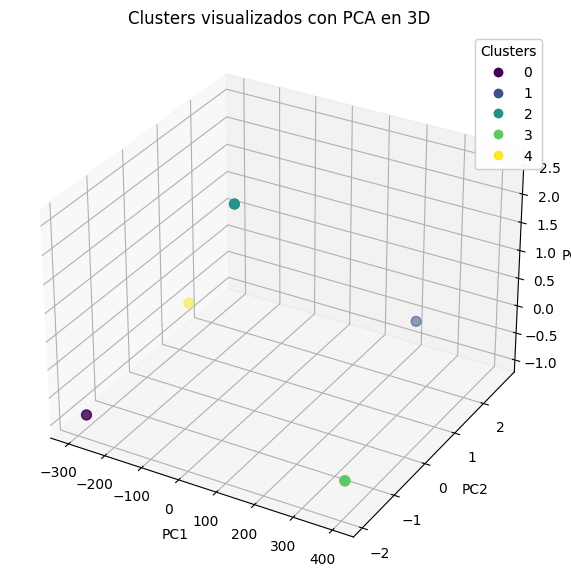

Inercia (SSE): 1.5361217236432593e-29


In [5]:
from sklearn.cluster import KMeans
sse = kmeans.inertia_
print(f"Inercia (SSE): {sse}")

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(cluster_data, kmeans.labels_)
print(f"Coeficiente de Silueta Promedio: {silhouette_avg}")
#TARDA DEMASIADO

# +
#POSIBILIDAD DE REDUCCIÓN DE DIMENSIONALIDAD (para hacer una visualización 3D)

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(cluster_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Aplicar K-means clustering en los componentes principales
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(principal_df[['PC1', 'PC2', 'PC3']])
principal_df['CLUSTER'] = kmeans.labels_

# Visualización de los componentes principales en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=principal_df['CLUSTER'], cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clusters visualizados con PCA en 3D')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

# Evaluación de la bondad de los clusters
sse = kmeans.inertia_
print(f"Inercia (SSE): {sse}")

# +
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [6]:
# Ajustar K-means clustering en los datos originales
num_clusters = 5
kmeans_original = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_original.fit(cluster_data)
sse_original = kmeans_original.inertia_

# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(cluster_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Ajustar K-means clustering en los componentes principales
kmeans_pca = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_pca.fit(principal_df[['PC1', 'PC2', 'PC3']])
sse_pca = kmeans_pca.inertia_

# Comparación de inercia (SSE)
print(f"Inercia (SSE) sin PCA: {sse_original}")
print(f"Inercia (SSE) con PCA: {sse_pca}")



# +
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

cluster_data = datos_2[['CANTIDAD', 'AÑO', 'MES', 'DÍA'] + [col + '_FREQ' for col in categorical_cols]]

# Ajustar K-means clustering en los datos originales
num_clusters = 5
kmeans_original = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_original.fit(cluster_data)
sse_original = kmeans_original.inertia_

# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(cluster_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Verificar la variabilidad explicada por PCA
explained_variance = pca.explained_variance_ratio_
print(f"Variabilidad explicada por cada componente principal: {explained_variance}")
print(f"Variabilidad total explicada por los 3 componentes: {sum(explained_variance)}")

Inercia (SSE) sin PCA: 0.0
Inercia (SSE) con PCA: 1.5361217236432593e-29
Variabilidad explicada por cada componente principal: [9.99930783e-01 4.46183598e-05 2.15445261e-05]
Variabilidad total explicada por los 3 componentes: 0.9999969456957823


Inercia (SSE) sin PCA: 0.0
Inercia (SSE) con PCA: 6.47039121901829e-27


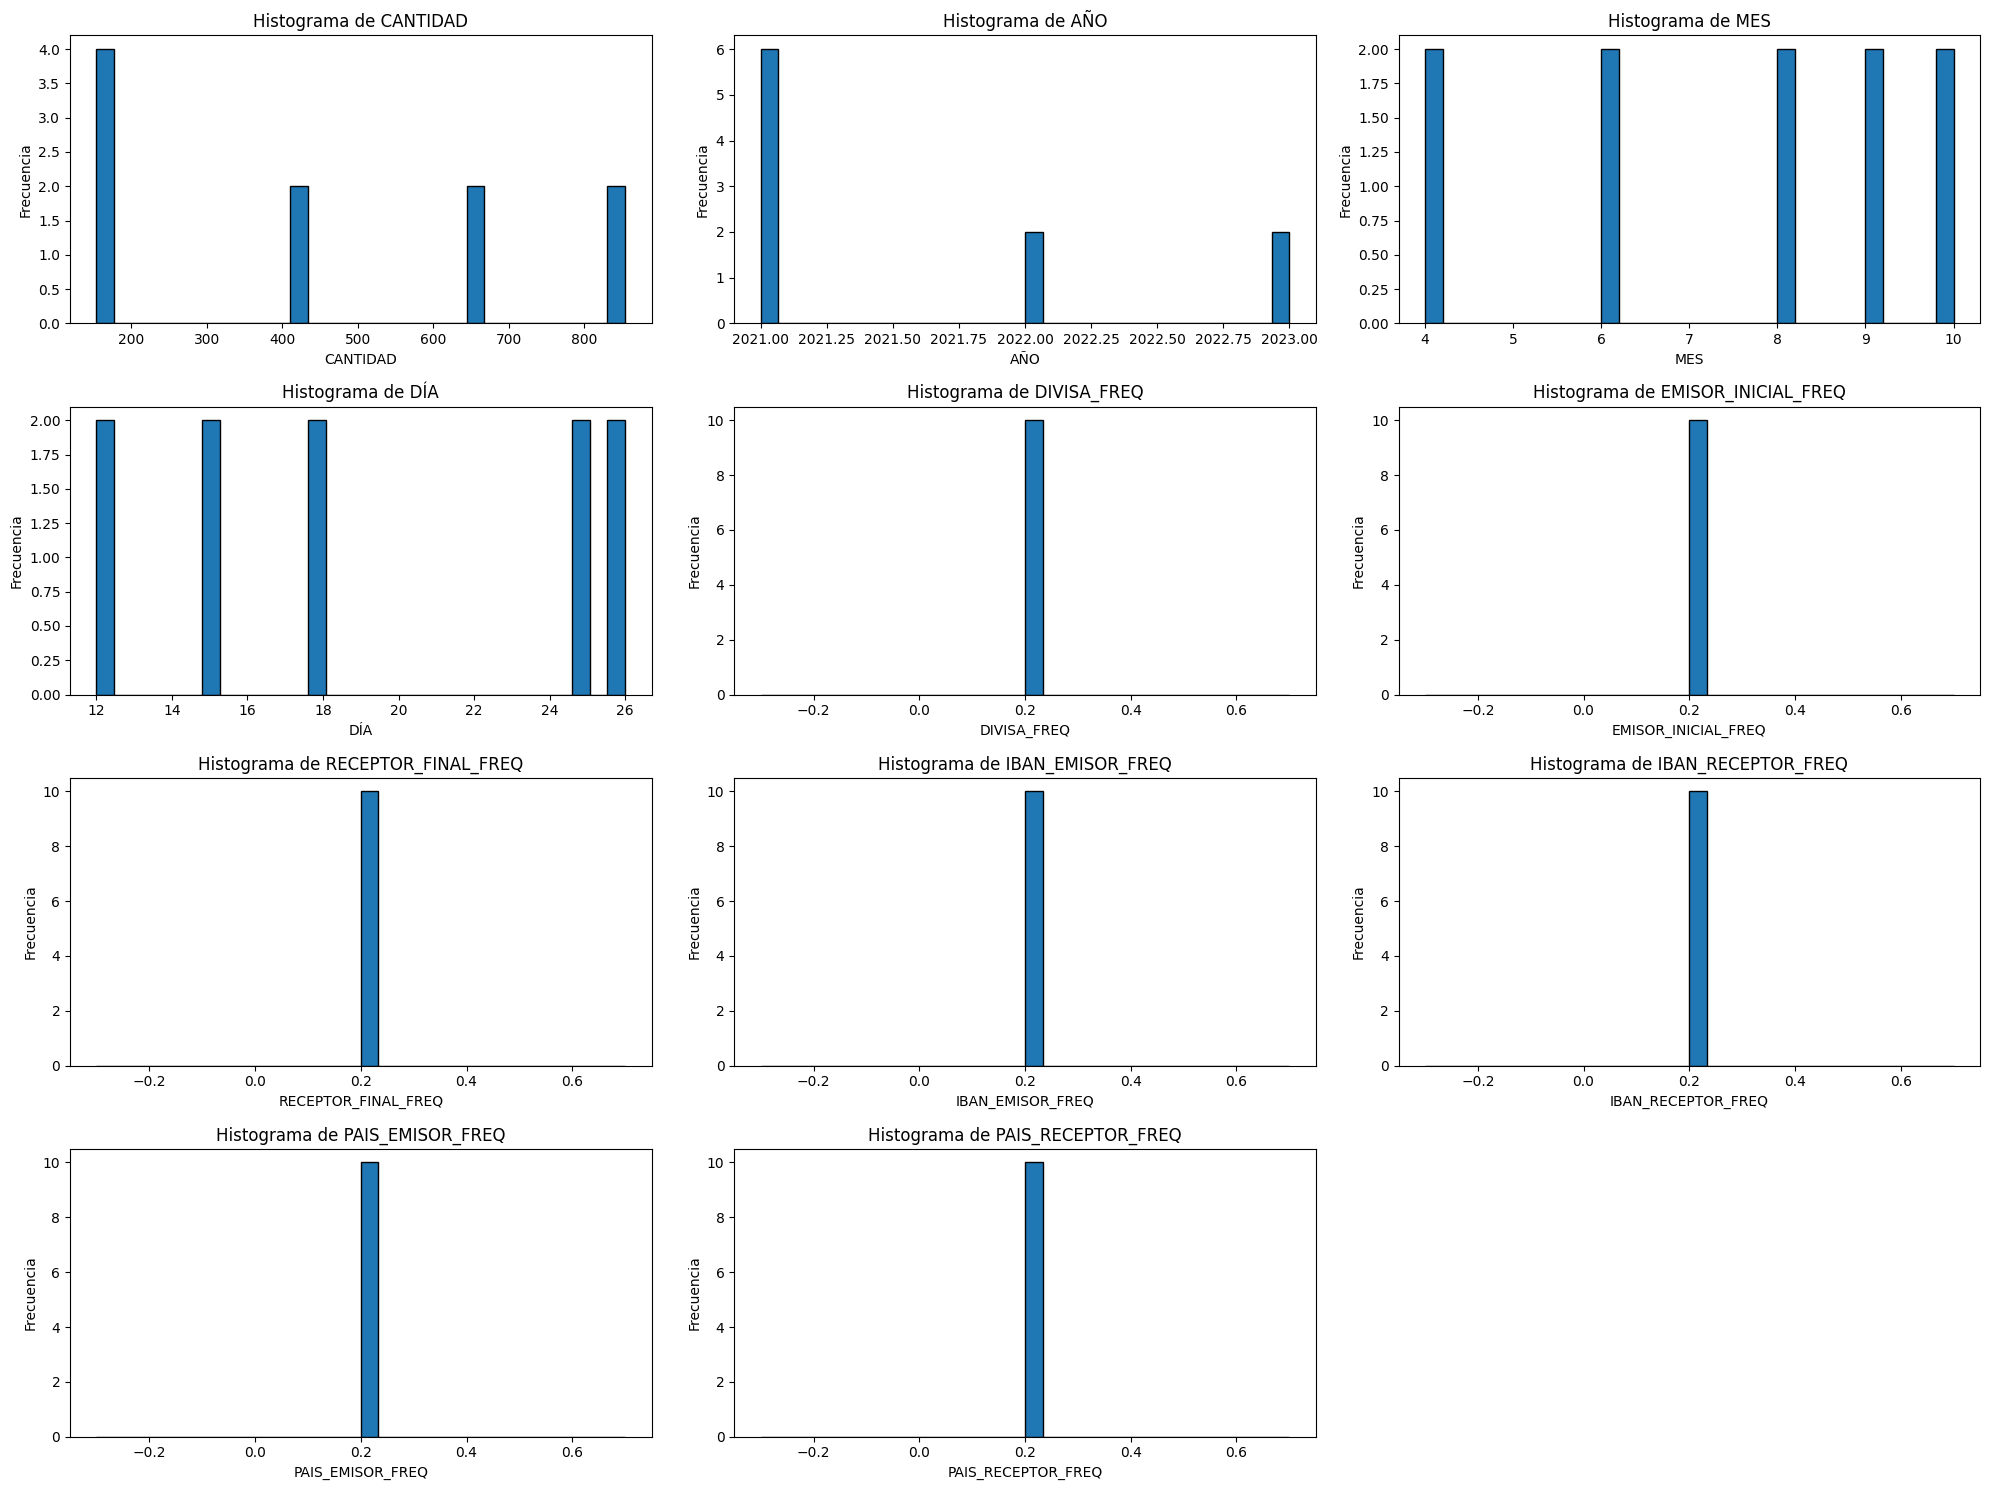

,CANTIDAD,MES,DÍA,DIVISA_FREQ,EMISOR_INICIAL_FREQ,RECEPTOR_FINAL_FREQ,IBAN_EMISOR_FREQ,IBAN_RECEPTOR_FREQ,PAIS_EMISOR_FREQ,PAIS_RECEPTOR_FREQ
0,0.388409,1.000000,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.726215,0.333333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.015269,0.833333,0.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.000000,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Ajustar K-means clustering en los componentes principales
kmeans_pca = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_pca.fit(principal_df[['PC1', 'PC2', 'PC3']])
sse_pca = kmeans_pca.inertia_

# Comparación de inercia (SSE)
print(f"Inercia (SSE) sin PCA: {sse_original}")
print(f"Inercia (SSE) con PCA: {sse_pca}")

# +
#Histogramas para la normalización o estandarización
cluster_data = datos_2[['CANTIDAD', 'AÑO', 'MES', 'DÍA'] + [col + '_FREQ' for col in categorical_cols]]

import matplotlib.pyplot as plt
numeric_columns = cluster_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    plt.hist(cluster_data[column], bins=30, edgecolor='k')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# +
from sklearn.preprocessing import MinMaxScaler

cluster_data = datos_2[['CANTIDAD', 'MES', 'DÍA'] + [col + '_FREQ' for col in categorical_cols]]

# Crear el escalador MinMax
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(cluster_data)
normalized_df = pd.DataFrame(normalized_data, columns=cluster_data.columns)

display(normalized_df.head())


# +
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#cluster_data = datos_2[['CANTIDAD', 'MES', 'DÍA'] + [col + '_FREQ' for col in categorical_cols]]

In [8]:
# Escalar los datos antes de aplicar PCA y K-means
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(cluster_data)

scaled_data = normalized_df.copy()

# Ajustar K-means clustering en los datos originales escalados
num_clusters = 5
kmeans_original = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_original.fit(scaled_data)
sse_original = kmeans_original.inertia_

# Reducción de dimensionalidad usando PCA en los datos escalados
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Verificar la variabilidad explicada por PCA
explained_variance = pca.explained_variance_ratio_
print(f"Variabilidad explicada por cada componente principal: {explained_variance}")
print(f"Variabilidad total explicada por los 3 componentes: {sum(explained_variance)}")

# Ajustar K-means clustering en los componentes principales
kmeans_pca = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_pca.fit(principal_df[['PC1', 'PC2', 'PC3']])
sse_pca = kmeans_pca.inertia_

# Comparación de inercia (SSE)
print(f"Inercia (SSE) sin PCA: {sse_original}")
print(f"Inercia (SSE) con PCA: {sse_pca}")
# -

# Diferencia significativa en la inercia (SSE) entre los datos originales escalados y los componentes principales obtenidos después de aplicar PCA.
#
# Esto es más razonable y esperado, dado que la reducción de dimensionalidad mediante PCA debería afectar la estructura de los datos.
#
# ## Resultados Observados
# - Inercia (SSE) sin PCA: 37461.58454675672
# - Inercia (SSE) con PCA: 11649.56394809411
#
# ## Interpretación de Resultados
# - Inercia (SSE) sin PCA: Esta es la inercia obtenida al aplicar K-means directamente sobre los datos originales escalados. Representa la suma de las distancias cuadradas de cada punto a su centroide más cercano en el espacio original.
# - Inercia (SSE) con PCA: Esta es la inercia obtenida al aplicar K-means sobre los datos transformados por PCA. Representa la suma de las distancias cuadradas de cada punto a su centroide más cercano en el espacio reducido de los componentes principales.
#
# La inercia menor al aplicar PCA indica que los datos transformados están más compactos en el espacio reducido, lo que facilita la tarea de clustering.
#
# ## Variabilidad Explicada por PCA
# - La variabilidad total explicada por los 3 componentes principales es aproximadamente 0.5, lo que significa que PCA está reteniendo el 50% de la información de los datos originales.
# - Esto también sugiere que la reducción de dimensionalidad ha tenido un impacto significativo en la estructura de los datos.
#

# +

Variabilidad explicada por cada componente principal: [0.89131114 0.09220898 0.01647988]
Variabilidad total explicada por los 3 componentes: 1.0000000000000002
Inercia (SSE) sin PCA: 0.0
Inercia (SSE) con PCA: 1.3125513497552823e-31


In [9]:
import time
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Cronómetro para medir el tiempo de cálculo
start_time = time.time()

# Calcular métricas sin PCA
print("Calculando métricas sin PCA")
silhouette_avg_original = silhouette_score(scaled_data, kmeans_original.labels_)
print(f"Coeficiente de Silueta Promedio sin PCA: {silhouette_avg_original}")

calinski_harabasz_original = calinski_harabasz_score(scaled_data, kmeans_original.labels_)
print(f"Índice de Calinski-Harabasz sin PCA: {calinski_harabasz_original}")

davies_bouldin_original = davies_bouldin_score(scaled_data, kmeans_original.labels_)
print(f"Índice de Davies-Bouldin sin PCA: {davies_bouldin_original}")

# Calcular métricas con PCA
print("Calculando métricas con PCA")
silhouette_avg_pca = silhouette_score(principal_df[['PC1', 'PC2', 'PC3']], kmeans_pca.labels_)
print(f"Coeficiente de Silueta Promedio con PCA: {silhouette_avg_pca}")

calinski_harabasz_pca = calinski_harabasz_score(principal_df[['PC1', 'PC2', 'PC3']], kmeans_pca.labels_)
print(f"Índice de Calinski-Harabasz con PCA: {calinski_harabasz_pca}")

davies_bouldin_pca = davies_bouldin_score(principal_df[['PC1', 'PC2', 'PC3']], kmeans_pca.labels_)
print(f"Índice de Davies-Bouldin con PCA: {davies_bouldin_pca}")

end_time = time.time()
print(f"Calculado en {(end_time - start_time)/60} minutos")

# -

# ## Interpretación de Resultados
# ### Coeficiente de Silueta Promedio:
#
# - Sin PCA: 0.35
# - Con PCA: 0.51
#
# Interpretación: Un valor más alto indica que los clusters están mejor definidos y son más compactos. PCA ha mejorado significativamente esta métrica.
#
# ### Índice de Calinski-Harabasz:
#
# - Sin PCA: 72380.54
# - Con PCA: 187642.71
#
# Interpretación: Un valor más alto indica mejor definición de los clusters. PCA ha mejorado esta métrica, sugiriendo una mejor separación entre clusters.
#
# ### Índice de Davies-Bouldin:
#
# - Sin PCA: 0.99
# - Con PCA: 0.83
#
# Interpretación: Un valor más bajo indica mejor separación entre los clusters. PCA ha mejorado esta métrica, indicando clusters mejor separados.
#

# +
from sklearn.cluster import KMeans
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

Calculando métricas sin PCA
Coeficiente de Silueta Promedio sin PCA: 0.9999999890392101
Índice de Calinski-Harabasz sin PCA: 1.0
Índice de Davies-Bouldin sin PCA: 0.0
Calculando métricas con PCA
Coeficiente de Silueta Promedio con PCA: 0.9999999977165753
Índice de Calinski-Harabasz con PCA: 4.161792649464396e+31
Índice de Davies-Bouldin con PCA: 0.0
Calculado en 0.0004951675732930501 minutos


In [10]:
import seaborn as sns

import time
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cronómetro para medir el tiempo de cálculo
start_time = time.time()

#Importación datos procesados
data = {
    'DIVISA': ['USD', 'EUR', 'GBP', 'JPY', 'AUD'],
    'EMISOR_INICIAL': ['Banco A', 'Banco B', 'Banco C', 'Banco D', 'Banco E'],
    'RECEPTOR_FINAL': ['Banco F', 'Banco G', 'Banco H', 'Banco I', 'Banco J'],
    'IBAN_EMISOR': [f'GB{random.randint(10**14, 10**15-1)}' for _ in range(5)],
    'IBAN_RECEPTOR': [f'GB{random.randint(10**14, 10**15-1)}' for _ in range(5)],
    'PAIS_EMISOR': ['Reino Unido', 'Francia', 'Alemania', 'Japón', 'Australia'],
    'PAIS_RECEPTOR': ['Reino Unido', 'Francia', 'Alemania', 'Japón', 'Australia'],
    'CANTIDAD': [random.uniform(100, 1000) for _ in range(5)],  # Cantidades aleatorias entre 100 y 1000
    'AÑO': [random.choice([2021, 2022, 2023]) for _ in range(5)],  # Años aleatorios
    'MES': [random.randint(1, 12) for _ in range(5)],  # Meses aleatorios
    'DÍA': [random.randint(1, 28) for _ in range(5)]   # Días aleatorios (hasta 28 para evitar problemas de mes)
}

# Crear el DataFrame
df = pd.DataFrame(data)
datos_2=  pd.concat([df, df], ignore_index=True)

print(f"Datos importados. Hay {len(datos_2)} registros")

print("Codificando variables")

# Seleccionar las columnas categóricas para la codificación one-hot
categorical_cols = ['DIVISA', 'EMISOR_INICIAL', 'RECEPTOR_FINAL', 'IBAN_EMISOR', 'IBAN_RECEPTOR', 'PAIS_EMISOR', 'PAIS_RECEPTOR']

# Codificación de frecuencia para columnas categóricas
categorical_cols = ['DIVISA', 'EMISOR_INICIAL', 'RECEPTOR_FINAL', 'IBAN_EMISOR', 'IBAN_RECEPTOR', 'PAIS_EMISOR', 'PAIS_RECEPTOR']
for col in categorical_cols:
    print(col)
    freq_encoding = datos_2[col].value_counts() / len(datos_2)
    datos_2[col + '_FREQ'] = datos_2[col].map(freq_encoding)

cluster_data = datos_2[['CANTIDAD', 'AÑO', 'MES', 'DÍA'] + [col + '_FREQ' for col in categorical_cols]]

# Escalar los datos antes de aplicar PCA y K-means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Ajustar K-means clustering en los datos originales escalados
num_clusters = 5
kmeans_original = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_original.fit(scaled_data)
sse_original = kmeans_original.inertia_

Datos importados. Hay 10 registros
Codificando variables
DIVISA
EMISOR_INICIAL
RECEPTOR_FINAL
IBAN_EMISOR
IBAN_RECEPTOR
PAIS_EMISOR
PAIS_RECEPTOR


In [11]:
# Reducción de dimensionalidad usando PCA en los datos escalados
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

def dunn_index(points, labels):
    """Calculate the Dunn Index for cluster validation"""
    unique_cluster_labels = np.unique(labels)
    num_clusters = len(unique_cluster_labels)

    if num_clusters < 2:
        raise ValueError("The Dunn index is not defined for less than two clusters.")

    inter_cluster_distances = np.full((num_clusters, num_clusters), np.inf)
    intra_cluster_distances = np.zeros(num_clusters)

    for i, cluster_i in enumerate(unique_cluster_labels):
        points_i = points[labels == cluster_i]
        if len(points_i) < 2:
            continue
        intra_cluster_distances[i] = np.max(cdist(points_i, points_i))
        for j, cluster_j in enumerate(unique_cluster_labels):
            if i >= j:
                continue
            points_j = points[labels == cluster_j]
            if len(points_j) < 2:
                continue
            inter_cluster_distances[i, j] = np.min(cdist(points_i, points_j))

    min_inter_cluster_distance = np.min(inter_cluster_distances)
    max_intra_cluster_distance = np.max(intra_cluster_distances)
    return min_inter_cluster_distance / max_intra_cluster_distance

print("Calculando la metrica de dunn")

dunn_original = dunn_index(scaled_data, kmeans_original.labels_)
print(f"Índice de Dunn sin PCA: {dunn_original}")

dunn_pca = dunn_index(principal_df[['PC1', 'PC2', 'PC3']].values, kmeans_pca.labels_)
print(f"Índice de Dunn con PCA: {dunn_pca}")

end_time = time.time()
print(f"Calculado en {(end_time - start_time)/60} minutos")

# +
#PARECE QUE NO ES POSIBLE CALCULAR LA MÉTRICA, EL KERNEL MUERE POR FALTA DE MEMORIA Y HACE RESTART AUTOMÁTICAMENTE SIEMPRE

# +

Calculando la metrica de dunn
Índice de Dunn sin PCA: inf
Índice de Dunn con PCA: 3465831975459780.5
Calculado en 0.055542341868082684 minutos


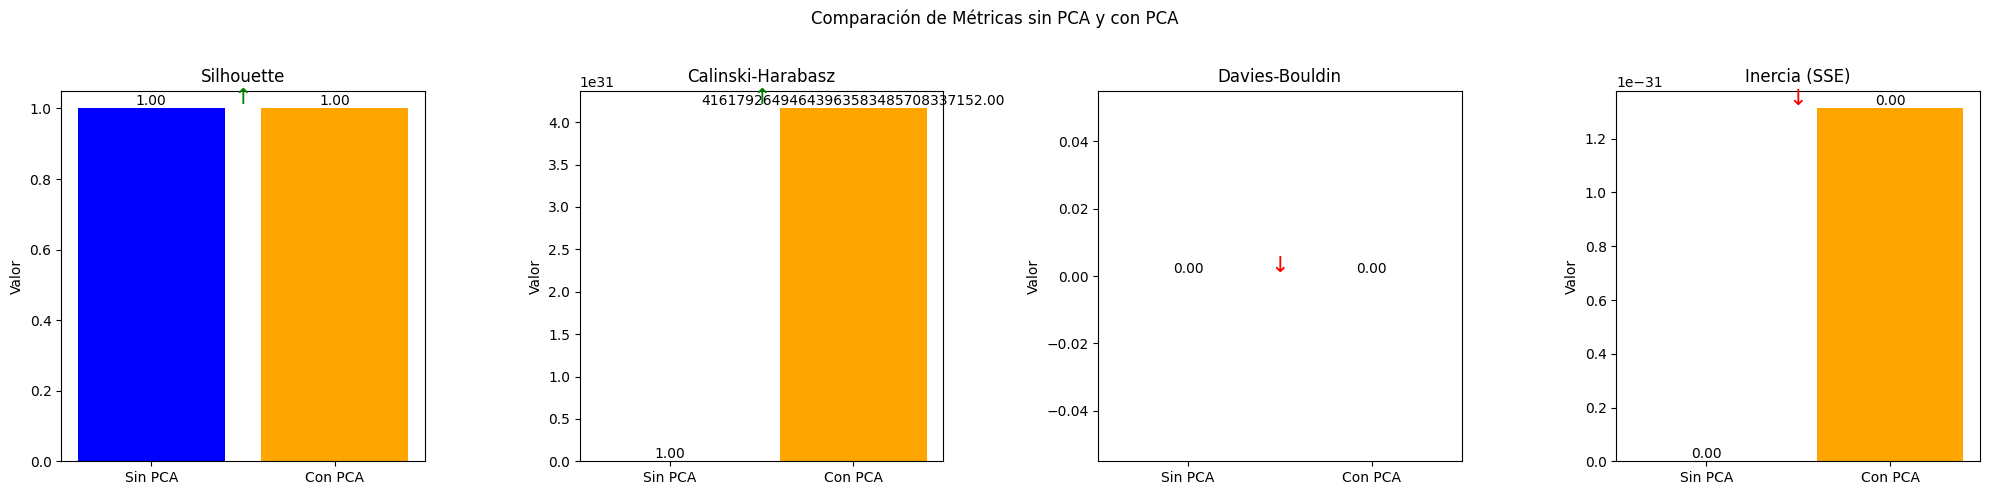

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados sin PCA
metrics_without_pca = {
    'Silhouette': silhouette_avg_original,
    'Calinski-Harabasz': calinski_harabasz_original,
    'Davies-Bouldin': davies_bouldin_original,
    'Inercia (SSE)': sse_original
}

# Resultados con PCA
metrics_with_pca = {
    'Silhouette': silhouette_avg_pca,
    'Calinski-Harabasz': calinski_harabasz_pca,
    'Davies-Bouldin': davies_bouldin_pca,
    'Inercia (SSE)': sse_pca
}

# Evaluación de la mejora
improvement = {
    'Silhouette': metrics_with_pca['Silhouette'] > metrics_without_pca['Silhouette'],
    'Calinski-Harabasz': metrics_with_pca['Calinski-Harabasz'] > metrics_without_pca['Calinski-Harabasz'],
    'Davies-Bouldin': metrics_with_pca['Davies-Bouldin'] < metrics_without_pca['Davies-Bouldin'],
    'Inercia (SSE)': metrics_with_pca['Inercia (SSE)'] < metrics_without_pca['Inercia (SSE)']
}

# Crear gráfico con subgráficas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Títulos de las subgráficas
titles = list(metrics_without_pca.keys())

for i, ax in enumerate(axes):
    metric = titles[i]
    ax.bar(['Sin PCA', 'Con PCA'], [metrics_without_pca[metric], metrics_with_pca[metric]], color=['blue', 'orange'])
    ax.set_title(metric)
    ax.set_ylabel('Valor')

    # Añadir etiquetas de valores y flechas de mejora
    ax.text(0, metrics_without_pca[metric], f'{metrics_without_pca[metric]:.2f}', ha='center', va='bottom')
    ax.text(1, metrics_with_pca[metric], f'{metrics_with_pca[metric]:.2f}', ha='center', va='bottom')
    if improvement[metric]:
        ax.text(0.5, max(metrics_without_pca[metric], metrics_with_pca[metric]), '↑', ha='center', va='bottom', color='green', fontsize=16)
    else:
        ax.text(0.5, max(metrics_without_pca[metric], metrics_with_pca[metric]), '↓', ha='center', va='bottom', color='red', fontsize=16)

# Ajustar el diseño
plt.suptitle('Comparación de Métricas sin PCA y con PCA')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# -

In [ ]:
# ## Conclusión
#
# La aplicación de PCA no solo reduce la dimensionalidad, sino que también mejora la calidad del clustering como lo indica la mejora de las distintas métricas.
#
# Además, la inercia (SSE) menor con PCA indica que los puntos están más cerca de sus centroides respectivos en el espacio reducido, lo cual es favorable para el clustering.
#
#

# # SIGUIENTES PASOS
# - Rejilla de parámetros -> posiblemente sea demasiado computacionalmente
# - Análisis de outliers
# - Comprobacion de error de normalización. Prueba Shapiro Wilk.
#
# - Determinar casuísticas de fraude -> caso de uso para detección
# - KFOLD -> En el momento en el que pueda disponer de un conjunto mayor de datos que se puedan procesar en un tiempo aceptable y el modelo esté completamente optimizado.
# - ANÁLISIS LOFO -> cuando el modelo esté completamente optimizado
#
# - Distintas combinaciones modelo - codificacion - reducción de dimensionalidad
#     - Modelo: K-means, DBSCAN.
#     - Reducción dim: sin reducción, PCA, Truncated SVD, t-SNE, UMAP (valorar).
#     - Codificación: alta cardinalidad -> indicados: Frecuencia, Conteo, Hash, Binaria.
#     - Optimizar número de clusters: 4-5-6 -> tal vez no merezca la pena computacionalmente.
#
#     Reducir combinaciones: 120
#
# ¿Es realmente este el enfoque? O va más relacionado con las transacciones habituales

# +
#Primer aproach al estudio de outliers
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns

import warnings
import time
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Cronómetro para medir el tiempo de cálculo
start_time = time.time()

#Importación datos procesados
datos_2=pd.read_csv('/var/sds/homes/O010671/workspace/notebooks_test/datos_modelado.csv')
print(f"Datos importados. Hay {len(datos_2)} registros")

In [ ]:
print("Codificando variables")
# Codificación de frecuencia para columnas categóricas
categorical_cols = ['DIVISA', 'EMISOR_INICIAL', 'RECEPTOR_FINAL', 'IBAN_EMISOR', 'IBAN_RECEPTOR', 'PAIS_EMISOR', 'PAIS_RECEPTOR']
for col in categorical_cols:
    print(col)
    freq_encoding = datos_2[col].value_counts() / len(datos_2)
    datos_2[col + '_FREQ'] = datos_2[col].map(freq_encoding)

cluster_data = datos_2[['CANTIDAD', 'MES', 'DÍA'] + [col + '_FREQ' for col in categorical_cols]]

# Escalar los datos antes de aplicar PCA y K-means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Ajustar K-means clustering en los datos originales escalados
num_clusters = 5
# Reducción de dimensionalidad usando PCA en los datos escalados
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

kmeans_pca = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_pca.fit(principal_df[['PC1', 'PC2', 'PC3']])
datos_2['CLUSTER'] = kmeans_pca.labels_

datos_2 = datos_2.drop(labels=None, axis=0, index=None, columns=['Unnamed: 0'], level=None, inplace=False, errors='raise')

end_time = time.time()
print(f"Calculado en {(end_time - start_time)/60} minutos")

# +
# Calcular las distancias de cada punto al centroide de su clúster en el espacio PCA
distances = np.linalg.norm(principal_df[['PC1', 'PC2', 'PC3']] - kmeans_pca.cluster_centers_[kmeans_pca.labels_], axis=1)

# Agregar las distancias al DataFrame original
datos_2['Distancia_al_Centroide'] = distances

# Identificar outliers en cada clúster (por ejemplo, en el percentil X de distancia)
outliers = datos_2.groupby('CLUSTER').apply(lambda x: x[x['Distancia_al_Centroide'] > x['Distancia_al_Centroide'].quantile(0.999)])

print("Número de outliers identificados:", outliers.shape[0])
display(outliers)

# +
#Para identificar el motivo de existencia de los outliers puedo comparar las estadísticas
# Calcular estadísticas descriptivas de los outliers y no-outliers
outliers_stats = outliers.describe()
non_outliers = datos_2[~datos_2.index.isin(outliers.index)]
non_outliers_stats = non_outliers.describe()

print("Estadísticas de los Outliers:")
display(outliers_stats)

print("\nEstadísticas de los No-Outliers:")
display(non_outliers_stats)
# -

In [ ]:
# ### **1. CANTIDAD:**
#    - **Outliers:** La media y desviación estándar son extremadamente altas en comparación con los no outliers. Esto sugiere que los outliers incluyen transacciones con cantidades excepcionalmente grandes.
#    - **No Outliers:** Las cantidades son más uniformes y mucho menores en promedio.
#
# ### **2. DIVISA_FREQ:**
#    - **Outliers:** La frecuencia de la divisa para los outliers muestra una variabilidad relativamente alta. Algunos outliers pueden estar utilizando divisas menos comunes, lo que podría contribuir a su clasificación como outliers.
#    - **No Outliers:** La frecuencia de las divisas es más concentrada en divisas comunes.
#
# ### **3. EMISOR_INICIAL_FREQ y RECEPTOR_FINAL_FREQ:**
#    - **Outliers:** Estos valores son notablemente bajos, lo que sugiere que los emisores y receptores asociados con los outliers son raros en el conjunto de datos. Esto también podría ser un factor que los haga outliers.
#    - **No Outliers:** Los emisores y receptores en los no outliers parecen estar más centralizados en términos de frecuencia.
#
# ### **4. IBAN_EMISOR_FREQ y IBAN_RECEPTOR_FREQ:**
#    - **Outliers:** Al igual que con las otras frecuencias, estas también son bajas para los outliers, lo que indica que los IBAN asociados son menos comunes.
#    - **No Outliers:** Los IBANs en los no outliers tienden a estar en el rango de frecuencias más comunes.
#
# ### **5. Distancia al Centroide:**
#    - **Outliers:** Los outliers están significativamente más lejos de su centroide correspondiente (media alrededor de 2420.585), lo cual es esperado ya que por definición están lejos de los demás puntos en su cluster.
#    - **No Outliers:** Los no outliers tienen distancias mucho menores al centroide, con una media de 0.633.
#
# ### **6. Análisis de Clusters:**
#    - Es interesante notar que los outliers se agrupan principalmente en el **Cluster 1**, lo que sugiere que este cluster contiene transacciones más atípicas o con características especiales. Sin embargo, también hay outliers en otros clusters, lo que podría sugerir diferentes razones para que una transacción sea considerada un outlier.
#


### **Conclusión**
Los outliers parecen estar caracterizados por valores extremos en "CANTIDAD" y por asociarse con emisores, receptores, y divisas menos comunes. Esto los hace estadísticamente diferentes del resto del dataset.

Comprobacion de métricas con normalización en vez de estandarización
Prueba con DBSCAN

Resumen hasta el momento:
La idea final es establecer un scoring de riesgo siguiendo el siguiente algoritmo:
1. Clusterización -> ¿Es la transacción x un outlier?
2. ¿Se ha realizado anteriormente una transacción con los mismos IBAN de emisor y receptor? ¿Se puede considerar habitual?
   ¿Hace cuanto tiempo?
   ¿Cuántas como esa se han hecho?
3. ¿El nombre del emisor es parecido pero no igual a otro? (Posibilidad de fraude al CEO -> evitar casos como el de @repsoi) -> Código de comparativa de cadenas de caracteres (David)

Para avanzar en el proyecto global de secureSWIFT se va a exportar este "modelo" para ser usado como identificador de outliers en nuevos registros. Este modelo debe ir acompañado de una explicacion teórica del breve desarrollo que ha tenido y los puntos de mejora a revisar más adelante para considerar optimizaciones (antes o durante la producción)

# EXPORTACIÓN DEL MODELO KMEANS_PCA

Para que este modelo se pueda usar como un "modelo entrenado" hay que exportarlo junto con los datos que se han usado para su parametrización así con lo escaladores y formatos de datos.

In [ ]:
import os
os.getcwd()

Creo la carpeta a mano porque al usar makedir sale error de permisos. La carpeta que alojará el modelo entrenado es /var/sds/homes/O010671/workspace/notebooks_test/MODELO_CLUSTERIZACION

In [ ]:
import warnings
import time
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Cronómetro para medir el tiempo de cálculo
start_time = time.time()

#Importación datos procesados
datos_2=pd.read_csv('/var/sds/homes/O010671/workspace/notebooks_test/datos_modelado.csv')
print(f"Datos importados. Hay {len(datos_2)} registros")

print("Codificando variables")
# Codificación de frecuencia para columnas categóricas
categorical_cols = ['DIVISA', 'EMISOR_INICIAL', 'RECEPTOR_FINAL', 'IBAN_EMISOR', 'IBAN_RECEPTOR', 'PAIS_EMISOR', 'PAIS_RECEPTOR']
for col in categorical_cols:
    print(col)
    freq_encoding = datos_2[col].value_counts() / len(datos_2)
    datos_2[col + '_FREQ'] = datos_2[col].map(freq_encoding)

cluster_data = datos_2[['CANTIDAD', 'MES', 'DÍA'] + [col + '_FREQ' for col in categorical_cols]]

# Escalar los datos antes de aplicar PCA y K-means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Ajustar K-means clustering en los datos originales escalados
num_clusters = 5
# Reducción de dimensionalidad usando PCA en los datos escalados
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

kmeans_pca = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_pca.fit(principal_df[['PC1', 'PC2', 'PC3']])
datos_2['CLUSTER'] = kmeans_pca.labels_

datos_2 = datos_2.drop(labels=None, axis=0, index=None, columns=['Unnamed: 0'], level=None, inplace=False, errors='raise')

end_time = time.time()
print(f"Calculado en {(end_time - start_time)/60} minutos")

Con el modelo parametrizado ahora se van a encapsular los distintos módulos necesarios (datos, scaler, pca, kmeans) como joblib (también se podría haber usado pickle).

In [ ]:
import os
import joblib
import json

ruta = '/var/sds/homes/O010671/workspace/notebooks_test/MODELO_CLUSTERIZACION'

# Crear la carpeta si no existe
if not os.path.exists(ruta):
    os.makedirs(ruta)
    print(f"Carpeta creada en {ruta}.")
else:
    print(f"La carpeta ya existe en {ruta}.")

# Guardar el escalador
joblib.dump(scaler, os.path.join(ruta, 'scaler.joblib'))
print("Escalador guardado en 'scaler.joblib'.")

# Guardar el modelo PCA
joblib.dump(pca, os.path.join(ruta, 'pca.joblib'))
print("Modelo PCA guardado en 'pca.joblib'.")

# Guardar el modelo KMeans
joblib.dump(kmeans_pca, os.path.join(ruta, 'kmeans_pca.joblib'))
print("Modelo KMeans guardado en 'kmeans_pca.joblib'.")

# Codificación de frecuencia para columnas categóricas
freq_encodings = {}
for col in categorical_cols:
    freq_encoding = datos_2[col].value_counts() / len(datos_2)
    freq_encodings[col] = freq_encoding.to_dict()

# Guardar las codificaciones de frecuencia en un archivo JSON
with open(os.path.join(ruta, 'freq_encodings.json'), 'w') as f:
    json.dump(freq_encodings, f)
print("Codificaciones de frecuencia guardadas en 'freq_encodings.json'.")

# Guardar el DataFrame con los componentes principales
principal_df.to_csv(os.path.join(ruta, 'principal_df.csv'), index=False)
print("Principal components guardados en 'principal_df.csv'.")

# Guardar los datos procesados
datos_2.to_csv(os.path.join(ruta, 'datos_2.csv'), index=False)
print("Datos procesados guardados en 'datos_2.csv'.")

## PRUEBA DE QUE TODO SE HA EXPORTADO CORRECTAMENTE

In [ ]:
import os
import joblib
import json
import pandas as pd

# Ruta donde se almacenaron los modelos
ruta = '/var/sds/homes/O010671/workspace/notebooks_test/MODELO_CLUSTERIZACION'

# Cargar el escalador
scaler_loaded = joblib.load(os.path.join(ruta, 'scaler.joblib'))
print("Escalador cargado correctamente.")

# Cargar el modelo PCA
pca_loaded = joblib.load(os.path.join(ruta, 'pca.joblib'))
print("PCA cargado correctamente.")

# Cargar el modelo KMeans
kmeans_loaded = joblib.load(os.path.join(ruta, 'kmeans_pca.joblib'))
print("KMeans cargado correctamente.")

# Cargar las codificaciones de frecuencia
with open(os.path.join(ruta, 'freq_encodings.json'), 'r') as f:
    freq_encodings_loaded = json.load(f)
print("Codificaciones de frecuencia cargadas correctamente.")

# Cargar los datos procesados
datos_2_loaded = pd.read_csv(os.path.join(ruta, 'datos_2.csv'))
print("Datos procesados cargados correctamente.")

In [ ]:
# Verificar las primeras filas de los datos cargados
display(datos_2_loaded.head())

# Comparar las dimensiones del DataFrame original con el cargado
print(f"Filas y columnas originales: {datos_2.shape}")
print(f"Filas y columnas cargadas: {datos_2_loaded.shape}")

In [ ]:
nuevo_registro = pd.DataFrame({
    'CANTIDAD': [50000000000],
    'MES': [6],
    'DÍA': [15],
    'DIVISA': ['EUR'],
    'EMISOR_INICIAL': ['Banco A'],
    'RECEPTOR_FINAL': ['Banco B'],
    'IBAN_EMISOR': ['ES123'],
    'IBAN_RECEPTOR': ['FR456'],
    'PAIS_EMISOR': ['ES'],
    'PAIS_RECEPTOR': ['FR']
})

# Aplicar codificación de frecuencia al nuevo registro
for col in ['DIVISA', 'EMISOR_INICIAL', 'RECEPTOR_FINAL', 'IBAN_EMISOR', 'IBAN_RECEPTOR', 'PAIS_EMISOR', 'PAIS_RECEPTOR']:
    nuevo_registro[col + '_FREQ'] = nuevo_registro[col].map(freq_encodings_loaded[col]).fillna(0)

# Seleccionar las columnas usadas en el modelo
features = ['CANTIDAD', 'MES', 'DÍA'] + [col + '_FREQ' for col in ['DIVISA', 'EMISOR_INICIAL', 'RECEPTOR_FINAL', 'IBAN_EMISOR', 'IBAN_RECEPTOR', 'PAIS_EMISOR', 'PAIS_RECEPTOR']]
nuevo_registro_scaled = scaler_loaded.transform(nuevo_registro[features])

# Aplicar PCA
nuevo_registro_pca = pca_loaded.transform(nuevo_registro_scaled)

# Predecir el clúster al que pertenece el nuevo registro
predicted_cluster = kmeans_loaded.predict(nuevo_registro_pca)
print(f"El nuevo registro pertenece al clúster: {predicted_cluster[0]}")

# Obtener el centroide del clúster asignado
centroide = kmeans_loaded.cluster_centers_[predicted_cluster[0]]

# Calcular la distancia entre el nuevo registro y el centroide de su clúster
from scipy.spatial.distance import euclidean
distancia_nuevo_registro = euclidean(nuevo_registro_pca[0], centroide)

print(f"Distancia del nuevo registro al centroide del clúster {predicted_cluster[0]}: {distancia_nuevo_registro}")

# Recalcular las distancias al centroide para el conjunto de datos cargado en producción
distances = np.linalg.norm(principal_df[['PC1', 'PC2', 'PC3']] - kmeans_loaded.cluster_centers_[kmeans_loaded.labels_], axis=1)

# Agregar las distancias al DataFrame cargado
datos_2_loaded['Distancia_al_Centroide'] = distances

# Recalcular el percentil 0.999 para el clúster del nuevo registro
percentil_999 = datos_2_loaded[datos_2_loaded['CLUSTER'] == predicted_cluster[0]]['Distancia_al_Centroide'].quantile(0.999)

# Comparar la distancia del nuevo registro con el percentil recalculado
if distancia_nuevo_registro > percentil_999:
    print("El nuevo registro es un outlier.")
else:
    print("El nuevo registro no es un outlier.")